C:\Users\Syd_R\anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide


max value is 127.09610197865119
max index is 96
min value is 0.00580217667456312


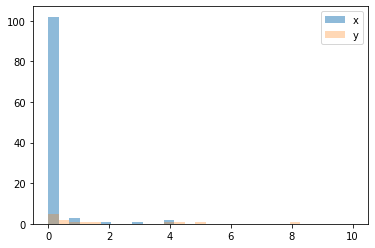

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 14 11:36:18 2020

@author: Syd_R
"""
from tkinter import *
import tkinter as tk
from PIL import Image, ImageDraw, ImageTk
from tkinter import filedialog
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import inf
from PIL import ImageTk
import io
from urllib.request import urlopen

root = tk.Tk()
root.title("Image Segmentation Using Otsu's Method")
C = Canvas(root, bg="steelblue", height=200, width=800)



URL = 'https://th.bing.com/th/id/OIP.mJxZ4xQWzWGmHrlCTMxo3QHaFj?pid=Api&w=640&h=480&rs=1'
my_page = urlopen(URL)
imgURL = io.BytesIO(my_page.read())
filename1= ImageTk.PhotoImage(Image.open(imgURL))
background_label = Label(root, image=filename1)
background_label.place(x=0, y=0, relwidth=1, relheight=1)
C.pack(expand = YES, fill = BOTH)

def open():
    global my_image
    openY=Toplevel(root)
    root.filename = filedialog.askopenfilename(initialdir = "/", 
                                          title = "Select a File", 
                                          filetypes = (("image files", 
                                                        "*.jpg*"), 
                                                       ("all files", 
                                                        "*.*")))
    
    
    
    img_1 = cv2.imread(root.filename)
    #grayscale image
    img_2	= cv2.imread(root.filename, cv2.IMREAD_GRAYSCALE)
    
    # arrange 2D array into 1D for creating image histogram
    histr = cv2.calcHist([img_2],[0],None,[256],[0,256]) 
    #length of the 1D array
    L = len(histr)
    
    # calculations
    P = np.true_divide(histr, np.sum(histr)) 
    omega = P.cumsum(axis=1)
    x = np.arange(0,L)
    x=np.array([x])
    A = P * np.transpose(x)
    mu = A.cumsum(axis=1)
    mu_t = mu[-1]
    mu_t = np.array([mu_t])
    
    some_val1 = np.multiply(mu_t, omega)  
    some_val2 = np.subtract(some_val1, mu)
    some_val3 = np.multiply (some_val2, some_val2)
    some_val4 = np.multiply(omega, (1-omega))
    some_val3 =  some_val3[np.logical_not(np.isnan(some_val3))]
    some_val4 =  some_val4[np.logical_not(np.isnan(some_val4))]
    sigma_b_squared  = some_val3/ some_val4
    
    # The sigma_b_squared might containe inf values
    np.isfinite(sigma_b_squared).all()
    # convert to array
    sigma_b_squared =np.array([sigma_b_squared])
    W1= np.transpose(sigma_b_squared)
    
    
    #max_value = np.nanmax(W1)      
    # array to list
    my_list = W1.tolist()
    #max value in the list
    max_value = np.nanmax(my_list)
    # index of the maximum value / this outputs the optimized pixel value or boundary
    max_index = my_list.index(max_value)
    # minimum value
    min_value = np.nanmin(sigma_b_squared) 
    
    print("max value is",max_value)
    print("max index is",max_index)
    print("min value is",min_value) 
    
    # normalize  data for plotting orignal image histogram and sigma_b_squared histogram
    hists = (W1 / max_value) * 255
    
    # plot both histograms together
    bins = np.linspace(0, 10, 30)
    plt.hist(histr, bins,  alpha=0.5, label='x')
    plt.hist(hists, bins, alpha=0.3, label='y')
    plt.legend(loc='upper right')
    plt.show()

    # Thresholding
    final_img = img_2.copy()
    final_img[img_2 > max_index] = 255
    final_img[img_2 < max_index] = 0
    cv2.imshow('Thresholded cell image',final_img)
    cv2.waitKey(0) 
    
    
    
    my_label = Label(root, text=root.filename).pack()
    my_image = ImageTk.PhotoImage(Image.open(root.filename))
    my_image_label = Label(openY, image=my_image).pack()

    
    
my_btn = Button(root,  text="Open Image File",  command=open).pack(pady = 20, padx = 20)

root.mainloop()



